# Tugas Besar Probabilitas dan Statistika
### Analisis Data dan Tes Hipotesis

<a href="https://github.com/maikeljh">Michael Jonathan Halim - 13521124</a>  
<a href="https://github.com/alifioditya">Enrique Alifio Ditya - 13521142</a>

# Import Necessary Libraries

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from math import sqrt
from scipy.stats import t, f
from IPython.display import Markdown, display

# Import Dataset

In [435]:
df = pd.read_csv("../data/anggur.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


# Exploratory Data Analysis

For a full and thorough overview of the dataset, you can open the `EDA.html` file in the `public` folder.

## Descriptive Statistics

In this section, we will examine a brief overview of the dataset.

### Missing Values

In [436]:
missing_values = df.isnull().sum(axis=0)
nan_cols = missing_values[missing_values > 0]
display(Markdown(f"Missing Data: {len(nan_cols)}"))

Missing Data: 0

The dataset contains no missing data.

### Feature Information

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


Based on the information above, all features are of numeric type

### Statistical Summary

In [438]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000


### Mode

In [439]:
def show_feature_modes(df):
    for col in df.columns:
        if df[col].nunique() == df[col].count():
            display(Markdown(f"{col}: Contains all unique values"))
        else:
            modes = df[col].mode().to_list()
            mode_str = ", ".join(str(mode) for mode in modes)
            display(Markdown(f"{col}: {mode_str}"))

In [440]:
show_feature_modes(df)

fixed acidity: 6.54

volatile acidity: 0.5546

citric acid: 0.3019

residual sugar: Contains all unique values

chlorides: Contains all unique values

free sulfur dioxide: Contains all unique values

total sulfur dioxide: 35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51

density: 0.9959, 0.9961, 0.9965, 0.997

pH: 3.34

sulphates: 0.59

alcohol: 9.86, 10.31

quality: 8

### Unique Values

In [441]:
df.nunique()

fixed acidity            417
volatile acidity         879
citric acid              769
residual sugar          1000
chlorides               1000
free sulfur dioxide     1000
total sulfur dioxide     881
density                  107
pH                        61
sulphates                 60
alcohol                  490
quality                    6
dtype: int64

From the output above, we can see that most of the features on the data contain a high number of unique values. The reason for this could be that the features are all of numerical type. On the other side, the target variable `quality` is a categorical column of numeric type, containing six different levels of quality.

### Skewness

In [442]:
df.skew()

fixed acidity          -0.028879
volatile acidity       -0.197699
citric acid            -0.045576
residual sugar          0.132638
chlorides              -0.051319
free sulfur dioxide     0.007130
total sulfur dioxide   -0.024060
density                -0.076883
pH                      0.147673
sulphates               0.149199
alcohol                -0.018991
quality                -0.089054
dtype: float64

Skewness is a statistical measure that indicates the symmetry of the distribution of a variable. A skewness value of 0 indicates a perfectly symmetrical distribution, while a positive or negative value indicates that the distribution is skewed to the right or left, respectively.

In the provided output, the skewness values for the columns implies the following:

| Columns               | Skewness| Interpretation                    |
|-----------------------|---------|-----------------------------------|
| `fixed acidity`       |-0.028879| Almost symmetrical distribution   |
| `volatile acidity`    |-0.197699| Moderately skewed to the left     |
| `citric acid`         |-0.045576| Almost symmetrical distribution   |
| `residual sugar`      |0.132638 | Moderately skewed to the right    |
| `chlorides`           |-0.051319| Almost symmetrical distribution   |
| `free sulfur dioxide` |0.007130 | Almost symmetrical distribution   |
| `total sulfur dioxide`|-0.024060| Almost symmetrical distribution   |
| `density`             |-0.076883| Almost symmetrical distribution   |
| `pH`                  |0.147673 | Moderately skewed to the right    |
| `sulphates`           |0.149199 | Moderately skewed to the right    |
| `alcohol`             |-0.018991| Almost symmetrical distribution   |
| `quality`             |-0.089054| Almost symmetrical distribution   |

### Kurtosis

In [443]:
df.kurtosis()

fixed acidity          -0.019292
volatile acidity        0.161853
citric acid            -0.104679
residual sugar         -0.042980
chlorides              -0.246508
free sulfur dioxide    -0.364964
total sulfur dioxide    0.063950
density                 0.016366
pH                      0.080910
sulphates               0.064819
alcohol                -0.131732
quality                 0.108291
dtype: float64

Kurtosis is a statistical measure that describes the shape of the distribution of a variable, specifically the degree of peakedness and thickness of the tails compared to a normal distribution. A kurtosis value of 0 indicates a normal distribution, while a positive value indicates a more peaked and thicker-tailed distribution (leptokurtic), and a negative value indicates a flatter and thinner-tailed distribution (platykurtic).

In the provided output, the kurtosis values for the columns are as follows:

| Columns               | Kurtosis| Interpretation                    |
|-----------------------|---------|-----------------------------------|
| `fixed acidity`       |-0.019292| Slightly platykurtic              |
| `volatile acidity`    | 0.161853| Slightly leptokurtic              |
| `citric acid`         |-0.104679| Slightly platykurtic              |
| `residual sugar`      |-0.042980| Slightly platykurtic              |
| `chlorides`           |-0.246508| Moderately platykurtic            |
| `free sulfur dioxide` |-0.364964| Moderately platykurtic            |
| `total sulfur dioxide`| 0.063950| Slightly leptokurtic              |
| `density`             |0.016366 | Slightly leptokurtic              |
| `pH`                  |0.080910 | Slightly leptokurtic              |
| `sulphates`           |0.064819 | Slightly leptokurtic              |
| `alcohol`             |-0.131732| Slightly platykurtic              |
| `quality`             |0.108291 | Slightly leptokurtic              |

### Quartiles and Interquartile Range

In [444]:
# Examine interquartile range
def iqr(data, col):
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    return ("| `{}` | {} | {} | {} | {} | {} | {} |\n".format(col, q25, q75, iqr, cut_off, lower, upper))

In [445]:
iqr_table = "| Columns | Q25 | Q75 | IQR | Cut Off | Lower Bound | Upper Bound |\n"
iqr_table += "| ------ | --- | --- | --- | ------- | ----------- | ----------- |\n"
for col in df.columns:
    iqr_table += iqr(df, col)

display(Markdown(iqr_table))

| Columns | Q25 | Q75 | IQR | Cut Off | Lower Bound | Upper Bound |
| ------ | --- | --- | --- | ------- | ----------- | ----------- |
| `fixed acidity` | 6.3774999999999995 | 8.0 | 1.6225000000000005 | 2.4337500000000007 | 3.9437499999999988 | 10.43375 |
| `volatile acidity` | 0.4561 | 0.585375 | 0.12927499999999997 | 0.19391249999999996 | 0.2621875 | 0.7792874999999999 |
| `citric acid` | 0.2378 | 0.302325 | 0.064525 | 0.0967875 | 0.1410125 | 0.3991125 |
| `residual sugar` | 1.896329943488683 | 3.220873482829786 | 1.3245435393411031 | 1.9868153090116547 | -0.09048536552297182 | 5.2076887918414405 |
| `chlorides` | 0.06657363190977357 | 0.09531150148556258 | 0.028737869575789013 | 0.04310680436368352 | 0.02346682754609005 | 0.1384183058492461 |
| `free sulfur dioxide` | 11.426716949457617 | 18.313097915395005 | 6.886380965937388 | 10.329571448906082 | 1.0971455005515356 | 28.642669364301085 |
| `total sulfur dioxide` | 33.785 | 47.0225 | 13.237500000000004 | 19.856250000000006 | 13.92874999999999 | 66.87875000000001 |
| `density` | 0.9946 | 0.9972 | 0.0025999999999999357 | 0.0038999999999999035 | 0.9907000000000001 | 1.0010999999999999 |
| `pH` | 3.23 | 3.37 | 0.14000000000000012 | 0.2100000000000002 | 3.0199999999999996 | 3.58 |
| `sulphates` | 0.53 | 0.67 | 0.14 | 0.21000000000000002 | 0.32 | 0.8800000000000001 |
| `alcohol` | 9.56 | 11.622499999999999 | 2.0624999999999982 | 3.0937499999999973 | 6.466250000000003 | 14.716249999999995 |
| `quality` | 7.0 | 9.0 | 2.0 | 3.0 | 4.0 | 12.0 |


Quartiles divides a dataset into four equal parts. Q1 or the first quartile is the value that separates the lowest 25% of the data. Q2 or the second quartile is the value that separates the data into two equal parts. Q3 or the third quartile is the value that separates the highest 25% of the data.

The interquartile range (IQR) is a measure of the spread of a dataset with quartiles. 
The formula for IQR:

$$ IQR = Q_{3} - Q_{1} $$

In the provided output, the IQR values for the columns are as follows:

| Columns               | IQR     | Interpretation                    |
|-----------------------|---------|-----------------------------------|
| `fixed acidity`       | 1.6225  | Moderately variable               |
| `volatile acidity`    | 0.1293  | Relatively less variable          |
| `citric acid`         | 0.0645  | Relatively less variable          |
| `residual sugar`      | 1.3245  | Moderately variable               |
| `chlorides`           | 0.0287  | Relatively less variable          |
| `free sulfur dioxide` | 6.8864  | Moderately variable               |
| `total sulfur dioxide`| 13.2375 | Highly variable                   |
| `density`             | 0.0026  | Relatively less variable          |
| `pH`                  | 0.14    | Moderately variable               |
| `sulphates`           | 0.14    | Moderately variable               |
| `alcohol`             | 2.0625  | Moderately variable               |
| `quality`             | 2.0     | Moderately variable               |

## Univariate Analysis

In this section, we will analyze each feature of the dataset in isolation. We will also conduct normality testing to check whether a feature is normally distributed.

### Brief Introduction  
### Histograms
Histograms shows the frequency distribution of the data in a column. The x-axis represents the values of the column, while the y-axis shows the frequency of those values.  

### Boxplots
Boxplots displays the distribution of the data in a compact manner. It shows the quartiles of the distribution, with the horizontal line in the box representing the median, the top and bottom of the box representing the first and third quartiles, and the whiskers representing the range of the data.

### Normal test
A normal test is a statistical method used to determine whether a set of data is normally distributed, which means that it follows a normal or Gaussian distribution. In this section, we will use D’Agostino-Pearson test provided by the scipy library. the D’Agostino-Pearson test is based on the following null hypothesis: the data comes from a normal distribution. The test statistic is a combination of the measures of skewness and kurtosis, and the p-value is computed based on the null distribution of this test statistic under the assumption that the data are normally distributed.

In [446]:
def hist_box_plot(data):
    # Create a figure with two subplots
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

    # Create a histogram subplot
    sns.histplot(data=data, ax=ax[0], kde=True)
    ax[0].set_xlabel('Values')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram')

    # Create a boxplot subplot
    sns.boxplot(data=data, ax=ax[1])
    ax[1].set_xlabel('Values')
    ax[1].set_ylabel('Distribution')
    ax[1].set_title('Boxplot')

    # Display the plot
    plt.show()

In [447]:
def describe_feature(data, feature):
    hist_box_plot(data[feature])

    # Calculate statistics
    median = data[feature].median()
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Create description
    if (feature != 'pH'):
        description = f"### {feature.capitalize()}\n"
    else:
        description = "### pH\n"
    description += f"The distribution of `{feature}` is:\n"

    # Shape
    if data[feature].skew() < -1 or data[feature].skew() > 1:
        description += "- Highly skewed\n"
    elif data[feature].skew() < -0.5 or data[feature].skew() > 0.5:
        description += "- Moderately skewed\n"
    else:
        description += "- Approximately symmetric\n"

    # Central tendency
    description += f"- The median is {median:.2f}\n"

    # Spread
    if data[feature].kurtosis() > 3:
        description += "- Heavy-tailed\n"
    elif data[feature].kurtosis() < 3:
        description += "- Light-tailed\n"
    else:
        description += "- Mesokurtic\n"

    # Boxplot
    description += f"\nThe boxplot of `{feature}` shows:\n"
    description += f"- The median is {median:.2f}\n"
    description += f"- The first quartile is {q1:.2f}\n"
    description += f"- The third quartile is {q3:.2f}\n"
    description += f"- The interquartile range is {iqr:.2f}\n"
    description += f"- Values below {lower:.2f} or above {upper:.2f} are considered outliers\n"

    # Display description
    display(Markdown(description))


In [448]:
def normality_test(df, col, alpha):
    statistic_value, p_value = scipy.stats.normaltest(df[col])
    message = "After conducting the normality test, we get:\n\n"
    message += f"Statistic Value: {statistic_value}\n\n"
    message += f"P-Value: {p_value}\n\n"
    if(p_value < alpha):
        message += f"With {(1.0 - alpha) * 100}% confidence, we can conclude that the {col} feature is not normally distributed"
    else:
        message += f"With {(1.0 - alpha) * 100}% confidence, we can conclude that the {col} feature is normally distributed"
    display(Markdown(message))

#### `Fixed Acidity`

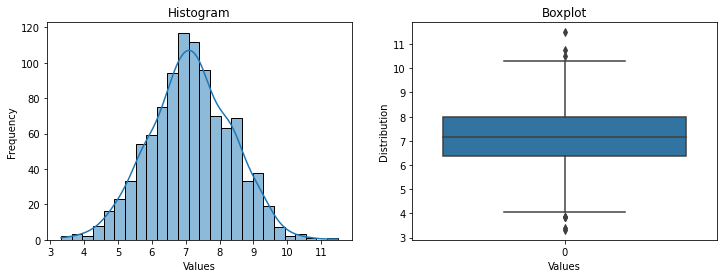

### Fixed acidity
The distribution of `fixed acidity` is:
- Approximately symmetric
- The median is 7.15
- Light-tailed

The boxplot of `fixed acidity` shows:
- The median is 7.15
- The first quartile is 6.38
- The third quartile is 8.00
- The interquartile range is 1.62
- Values below 3.94 or above 10.43 are considered outliers


In [449]:
describe_feature(df, 'fixed acidity')

The `fixed acidity` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 7, spreading across ranges of 3 to 11.

From the boxplot, we can see that this feature have most of the values ranging from 6 to 8, with 7 being the median. It also has minimal datapoints on the whiskers indicating that it does not have many outliers.

In [450]:
normality_test(df, 'fixed acidity', 0.05)

After conducting the normality test, we get:

Statistic Value: 0.14329615661430725

P-Value: 0.9308584274486692

With 95.0% confidence, we can conclude that the fixed acidity feature is normally distributed

#### `Volatile Acidity`

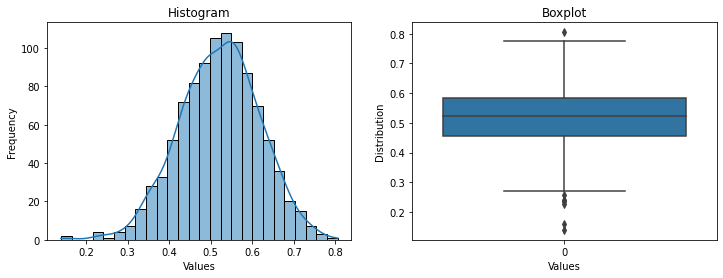

### Volatile acidity
The distribution of `volatile acidity` is:
- Approximately symmetric
- The median is 0.52
- Light-tailed

The boxplot of `volatile acidity` shows:
- The median is 0.52
- The first quartile is 0.46
- The third quartile is 0.59
- The interquartile range is 0.13
- Values below 0.26 or above 0.78 are considered outliers


In [451]:
describe_feature(df, 'volatile acidity')

The `volatile acidity` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 0.5, with values a little bit shifted to the right.

From the boxplot, we can see that this feature have most of the values ranging from 0.45 to 0.6, with 0.5 being the median. It also has moderate amount of datapoints on the whiskers indicating outliers.

In [452]:
normality_test(df, 'volatile acidity', 0.05)

After conducting the normality test, we get:

Statistic Value: 7.581251985533493

P-Value: 0.022581461594113835

With 95.0% confidence, we can conclude that the volatile acidity feature is not normally distributed

#### `Citric Acid`

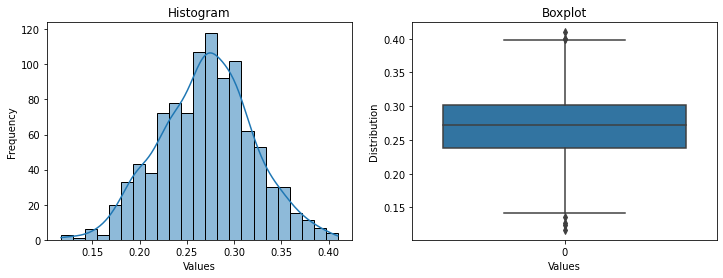

### Citric acid
The distribution of `citric acid` is:
- Approximately symmetric
- The median is 0.27
- Light-tailed

The boxplot of `citric acid` shows:
- The median is 0.27
- The first quartile is 0.24
- The third quartile is 0.30
- The interquartile range is 0.06
- Values below 0.14 or above 0.40 are considered outliers


In [453]:
describe_feature(df, 'citric acid')

The `citric acid` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 0.25, with values that has minimal spread.

From the boxplot, we can see that this feature have most of the values ranging from 0.25 to 0.3, with 0.25 being the median. It also has moderate amount of datapoints on the whiskers indicating outliers.

In [454]:
normality_test(df, 'citric acid', 0.05)

After conducting the normality test, we get:

Statistic Value: 0.7663607229418252

P-Value: 0.6816899375976969

With 95.0% confidence, we can conclude that the citric acid feature is normally distributed

#### `Residual Sugar`

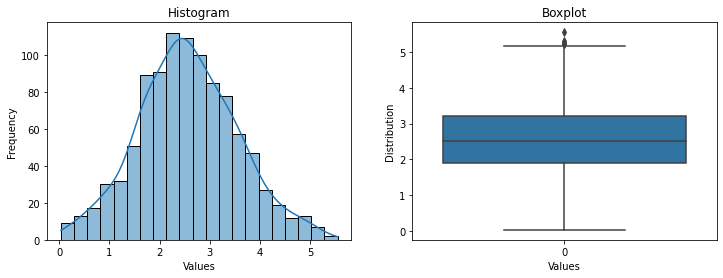

### Residual sugar
The distribution of `residual sugar` is:
- Approximately symmetric
- The median is 2.52
- Light-tailed

The boxplot of `residual sugar` shows:
- The median is 2.52
- The first quartile is 1.90
- The third quartile is 3.22
- The interquartile range is 1.32
- Values below -0.09 or above 5.21 are considered outliers


In [455]:
describe_feature(df, 'residual sugar')

The `residual sugar` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 2.5, with a little bit of skewness to the left.

From the boxplot, we can see that this feature have most of the values ranging from 2 to 3, with 2.5 being the median. It also has minimal amount of datapoints on the whiskers indicating that most of the values lie between Q1 and Q3.

In [456]:
normality_test(df, 'residual sugar', 0.05)

After conducting the normality test, we get:

Statistic Value: 2.9862716504538622

P-Value: 0.22466703321310558

With 95.0% confidence, we can conclude that the residual sugar feature is normally distributed

#### `Chlorides`

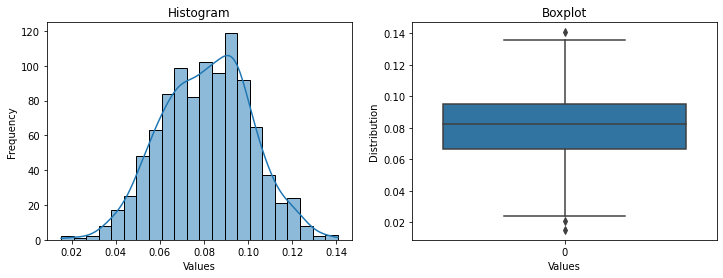

### Chlorides
The distribution of `chlorides` is:
- Approximately symmetric
- The median is 0.08
- Light-tailed

The boxplot of `chlorides` shows:
- The median is 0.08
- The first quartile is 0.07
- The third quartile is 0.10
- The interquartile range is 0.03
- Values below 0.02 or above 0.14 are considered outliers


In [457]:
describe_feature(df, 'chlorides')

The `chlorides` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 0.08, with jagged frequencies having the most at around 0.09.

From the boxplot, we can see that this feature has most of the values ranging from 0.06 to 0.09, with 0.08 being the median. It also has minimal amount of datapoints on the whiskers indicating it does not have many outliers.

In [458]:
normality_test(df, 'chlorides', 0.05)

After conducting the normality test, we get:

Statistic Value: 3.538242355484952

P-Value: 0.17048274704296862

With 95.0% confidence, we can conclude that the chlorides feature is normally distributed

#### `Free Sulfur Dioxide`

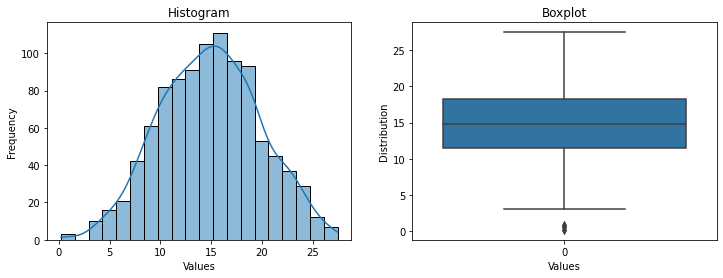

### Free sulfur dioxide
The distribution of `free sulfur dioxide` is:
- Approximately symmetric
- The median is 14.86
- Light-tailed

The boxplot of `free sulfur dioxide` shows:
- The median is 14.86
- The first quartile is 11.43
- The third quartile is 18.31
- The interquartile range is 6.89
- Values below 1.10 or above 28.64 are considered outliers


In [459]:
describe_feature(df, 'free sulfur dioxide')

The `free sulfur dioxide` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 15, having a wide spread of values around 0 to 25.

From the boxplot, we can see that this feature has most of the values ranging from 12 to 18, with 15 being the median. It also has little to no amount of datapoints on the whiskers indicating outliers.

In [460]:
normality_test(df, 'free sulfur dioxide', 0.05)

After conducting the normality test, we get:

Statistic Value: 8.099074980855514

P-Value: 0.01743043451827735

With 95.0% confidence, we can conclude that the free sulfur dioxide feature is not normally distributed

#### `Total Sulfur Dioxide`

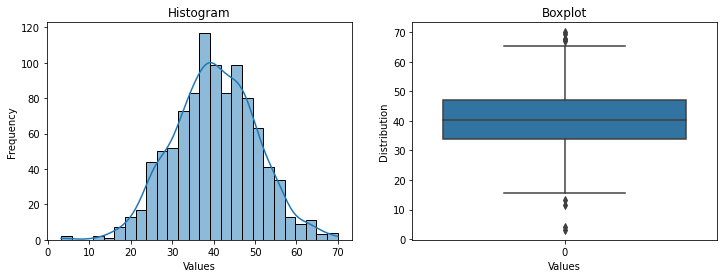

### Total sulfur dioxide
The distribution of `total sulfur dioxide` is:
- Approximately symmetric
- The median is 40.19
- Light-tailed

The boxplot of `total sulfur dioxide` shows:
- The median is 40.19
- The first quartile is 33.78
- The third quartile is 47.02
- The interquartile range is 13.24
- Values below 13.93 or above 66.88 are considered outliers


In [461]:
describe_feature(df, 'total sulfur dioxide')

The `total sulfur dioxide` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 40, with high frequency around the median.

From the boxplot, we can see that this feature has most of the values ranging from 35 to 45, with 40 being the median. It also has moderate amount of datapoints on the whiskers indicating outliers.

In [462]:
normality_test(df, 'total sulfur dioxide', 0.05)

After conducting the normality test, we get:

Statistic Value: 0.3276640291639825

P-Value: 0.8488846101395726

With 95.0% confidence, we can conclude that the total sulfur dioxide feature is normally distributed

#### `Density`

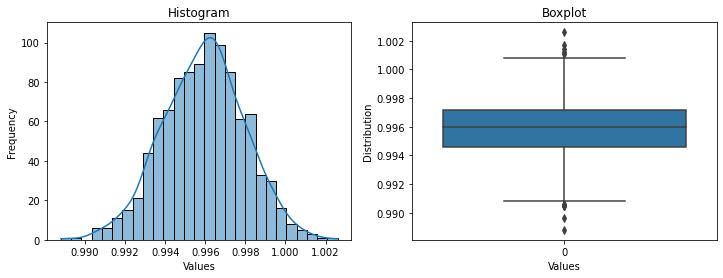

### Density
The distribution of `density` is:
- Approximately symmetric
- The median is 1.00
- Light-tailed

The boxplot of `density` shows:
- The median is 1.00
- The first quartile is 0.99
- The third quartile is 1.00
- The interquartile range is 0.00
- Values below 0.99 or above 1.00 are considered outliers


In [463]:
describe_feature(df, 'density')

The `density` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 0.996, with minimal spread ranging around 0.990 to 1.002.

From the boxplot, we can see that this feature has most of the values ranging from 0.995 to 0.997, with 0.996 being the median. It also has a moderately high amount of datapoints on the whiskers indicating outliers.

In [464]:
normality_test(df, 'density', 0.05)

After conducting the normality test, we get:

Statistic Value: 1.026581544320803

P-Value: 0.5985227325531981

With 95.0% confidence, we can conclude that the density feature is normally distributed

#### `pH`

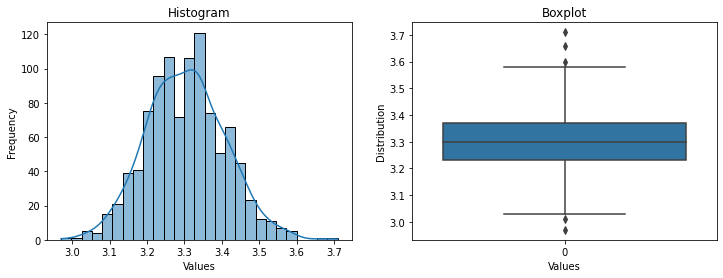

### pH
The distribution of `pH` is:
- Approximately symmetric
- The median is 3.30
- Light-tailed

The boxplot of `pH` shows:
- The median is 3.30
- The first quartile is 3.23
- The third quartile is 3.37
- The interquartile range is 0.14
- Values below 3.02 or above 3.58 are considered outliers


In [465]:
describe_feature(df, 'pH')

The `pH` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 3.3, with values a little bit skewed to the left.

From the boxplot, we can see that this feature has most of the values ranging from 3.23 to 3.38, with 3.3 being the median. It also has moderate amount of datapoints on the whiskers indicating outliers.

In [466]:
normality_test(df, 'pH', 0.05)

After conducting the normality test, we get:

Statistic Value: 3.9786546459928545

P-Value: 0.13678740824860436

With 95.0% confidence, we can conclude that the pH feature is normally distributed

#### `Sulphates`

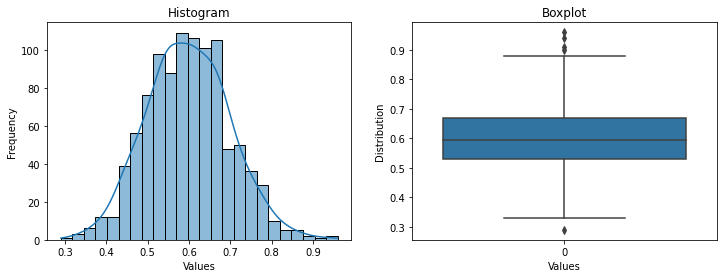

### Sulphates
The distribution of `sulphates` is:
- Approximately symmetric
- The median is 0.59
- Light-tailed

The boxplot of `sulphates` shows:
- The median is 0.59
- The first quartile is 0.53
- The third quartile is 0.67
- The interquartile range is 0.14
- Values below 0.32 or above 0.88 are considered outliers


In [467]:
describe_feature(df, 'sulphates')

The `sulphates` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 0.6, with values spreading around 0.3 to 0.9.

From the boxplot, we can see that this feature has most of the values ranging from 0.52 to 0.68, with 0.6 being the median. It also has moderate amount of datapoints on the whiskers indicating outliers.

In [468]:
normality_test(df, 'sulphates', 0.05)

After conducting the normality test, we get:

Statistic Value: 3.948820277859041

P-Value: 0.13884318628391681

With 95.0% confidence, we can conclude that the sulphates feature is normally distributed

#### `Alcohol`

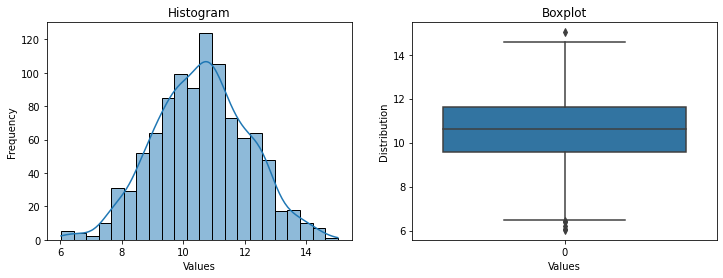

### Alcohol
The distribution of `alcohol` is:
- Approximately symmetric
- The median is 10.61
- Light-tailed

The boxplot of `alcohol` shows:
- The median is 10.61
- The first quartile is 9.56
- The third quartile is 11.62
- The interquartile range is 2.06
- Values below 6.47 or above 14.72 are considered outliers


In [469]:
describe_feature(df, 'alcohol')

The `alcohol` feature has a bell-shaped distribution resembling a normal distribution. It has a tendency to be centrally clustered around the value 11, with values spread around 6 to 14.

From the boxplot, we can see that this feature has most of the values ranging from 9 to 11.5, with 10.5 being the median. It also has moderate amount of datapoints on the whiskers indicating outliers.

In [470]:
normality_test(df, 'alcohol', 0.05)

After conducting the normality test, we get:

Statistic Value: 0.7740076714171271

P-Value: 0.6790884901361043

With 95.0% confidence, we can conclude that the alcohol feature is normally distributed

#### `Quality`

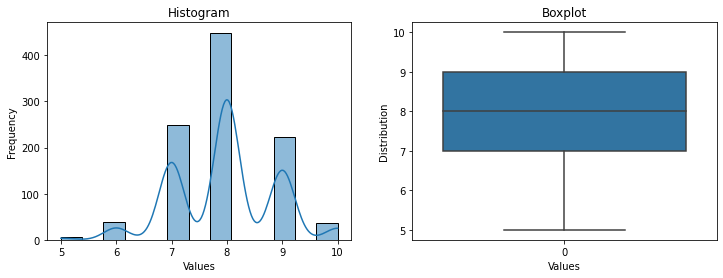

### Quality
The distribution of `quality` is:
- Approximately symmetric
- The median is 8.00
- Light-tailed

The boxplot of `quality` shows:
- The median is 8.00
- The first quartile is 7.00
- The third quartile is 9.00
- The interquartile range is 2.00
- Values below 4.00 or above 12.00 are considered outliers


In [471]:
describe_feature(df, 'quality')

The `quality` feature is the target variable with values ranging from 5 to 10. The dataset contains the highest frequency of quality level with the value of 8, followed by 7 and 9. 

From the boxplot, we can see that this feature does not have any outliers, as the feature is of categoric type containing numerical values, having integer classes from 5 to 10.

In [472]:
normality_test(df, 'quality', 0.05)

After conducting the normality test, we get:

Statistic Value: 1.8893087092494893

P-Value: 0.3888139394184818

With 95.0% confidence, we can conclude that the quality feature is normally distributed

### Proportion of the Target Variable

In [473]:
def plot_classes(y):
    counts = y.value_counts().sort_index()
    counts = counts.rename_axis("Quality").reset_index(name="Count")
    fig = px.pie(counts, values="Count", names="Quality", title="Quality Proportion Percentage", template="seaborn")
    fig.update_traces(textposition="inside", textinfo="percent+label")
    fig.show()
    print(counts)
    print()

In [474]:
plot_classes(df['quality'])

   Quality  Count
0        5      5
1        6     38
2        7    248
3        8    449
4        9    223
5       10     37



From the pie chart, we can infer that the quality classes are highly imbalanced, with class 8 having the highest proportion.

## Multivariate Analysis

In this section, we will analyze the underlying relationships and interactions between the variables in the dataset.

### Feature Correlation

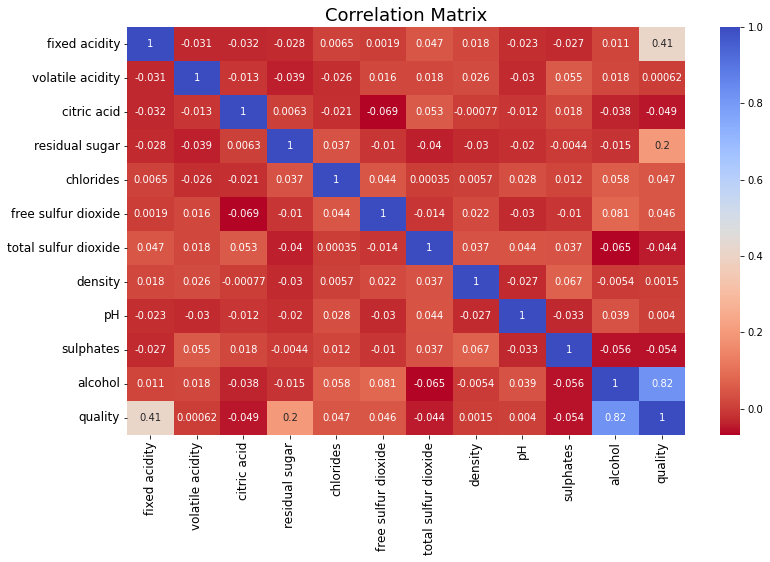

In [475]:
plt.figure(figsize = (12.5,7.5))
plt.title("Correlation Matrix", fontsize = 18)
sns.heatmap(df.corr(), cmap = 'coolwarm_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.show()

The correlation matrix reveals that the `alcohol` feature has a strong positive correlation with the target variable, followed by `fixed acidity` and `residual sugar`. This suggests that higher quality wines generally have high alcohol contents. Furthermore, we can also see that the correlation between the predictor variables are minimal, indicating that there is little multicollinearity among the non-target variables.

### Alcohol vs Quality

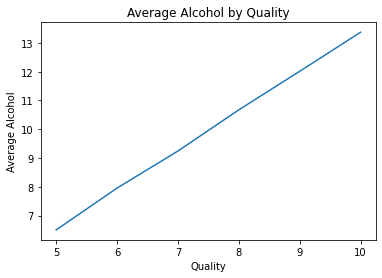

In [476]:
# Group the data by the 'quality' column and calculate the mean of 'alcohol'
alcohol_by_quality = df.groupby('quality')['alcohol'].mean()

# Plot a line chart of the average 'alcohol' value for each 'quality' level
alcohol_by_quality.plot(kind='line', x='quality', y='alcohol')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol')
plt.title('Average Alcohol by Quality')
plt.show()

From the line plot above, we can conclude that the `alcohol` feature has a linear relationship towards the `quality` of wine.

### Fixed Acidity vs Quality

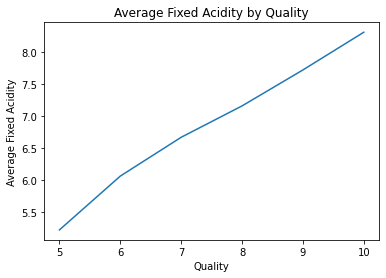

In [477]:
# Group the data by the 'quality' column and calculate the mean of 'fixed acidity'
fixed_acidity_by_quality = df.groupby('quality')['fixed acidity'].mean()

# Plot a line chart of the average 'fixed acidity' value for each 'quality' level
fixed_acidity_by_quality.plot(kind='line', x='quality', y='fixed acidity')
plt.xlabel('Quality')
plt.ylabel('Average Fixed Acidity')
plt.title('Average Fixed Acidity by Quality')
plt.show()

Similar to `alcohol`, the `fixed acidity` feature also have an approximately linear relationship with the `quality` variable.

### Residual Sugar vs Alcohol

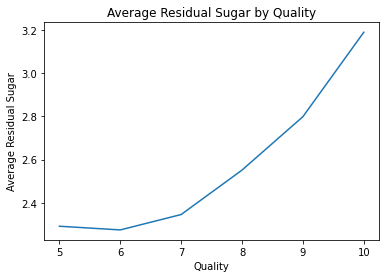

In [478]:
# Group the data by the 'quality' column and calculate the mean of 'residual sugar'
residual_sugar_by_quality = df.groupby('quality')['residual sugar'].mean()

# Plot a line chart of the average 'residual sugar' value for each 'quality' level
residual_sugar_by_quality.plot(kind='line', x='quality', y='residual sugar')
plt.xlabel('Quality')
plt.ylabel('Average Residual Sugar')
plt.title('Average Residual Sugar by Quality')
plt.show()

From this insight, we can say that the `quality` of wine improves exponentially towards the `residual sugar` feature.

# Hypothesis Testing

In this section, we will conduct single-sample and multisample hypothesis testing on the dataset.

## Single-sample Hypothesis

In [479]:
def t_test_mean(sample, attribute, mean, tail):
    computed_average = sample[attribute].mean()
    computed_std = sample[attribute].std()

    t_value = (computed_average - mean) / (computed_std / sqrt(len(sample)))
    degree = len(sample) - 1

    if (tail == 2):
        p_value = 2 * (1 - scipy.stats.t.cdf(abs(t_value), degree))
    else:
        p_value = scipy.stats.t.cdf(t_value, degree)

    display(Markdown(f"Computed Average : {computed_average}"))
    display(Markdown(f"Computed Standard Derivation : {computed_std}"))
    display(Markdown(f"T-Value : {t_value}"))
    display(Markdown(f"P-Value : {p_value}"))

    return t_value, p_value

In [480]:
def z_test_proportion(sample, qualified_sample, proportion):
    n = len(sample)
    x = len(qualified_sample)

    p = x / n
    z_value = (p - proportion) / sqrt((proportion * (1 - proportion) / n))
    p_value = scipy.stats.norm.sf(abs(z_value)) * 2

    display(Markdown(f"n       : {n}"))
    display(Markdown(f"x       : {x}"))
    display(Markdown(f"Z-Value : {z_value}"))
    display(Markdown(f"P-Value : {p_value}"))
    

In [481]:
def calculate_t_critical_value(LOS, degree):
    critical_value = scipy.stats.t.ppf(LOS, degree)

    return critical_value

### 1. Is the mean `pH` value greater than 3.29?

Step 1 : Specifying the null hypothesis (<b>H<sub>0</sub>)

<b>H<sub>0</sub> : The mean pH value equals to 3.29 ( *&mu;* = 3.29 )</b>

Step 2 : Specifying the alternative hypothesis (H<sub>1</sub>)

<b>H<sub>1</sub> : The mean pH value is greater than 3.29 ( *&mu;* > 3.29 ) (one-tailed test)</b>

Step 3 : Decide the level of significance (α)

<b>α = 0.05</b>

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t > t<sub>0.95, 999</sub>
</b>

In [482]:
t_critical_value = abs(calculate_t_critical_value(0.05, len(df) - 1))

display(Markdown(f"Critical Value = {t_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {t_critical_value} to reject the null hypothesis"))

Critical Value = 1.6463803454275356

So, the t-value must be greater than 1.6463803454275356 to reject the null hypothesis

Step 5 : Calculate T-Test and P-Value from Data Sample

The formula of t-value:

$$ t = \frac{\bar{x_{}} - μ_{0}} {s/\sqrt{n}} $$

In [483]:
t_value, p_value = t_test_mean(df, "pH", 3.29, 1)

Computed Average : 3.30361

Computed Standard Derivation : 0.10487548220040166

T-Value : 4.1037807933651145

P-Value : 0.9999780204169362

Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean pH value is greater than 3.29 because the T-Value is greater than the critical value (t > 1.646) and the P-Value is also far less than 0.05 (level of significance)</b>

### 2. Is the mean of `Residual Sugar` not equal to 2.5?

Step 1 : Specifying the null hypothesis (<b>H<sub>0</sub>)

<b>H<sub>0</sub> : the mean of Residual Sugar equals to 2.5 ( *&mu;* = 2.5 )</b>

Step 2 : Specifying the alternative hypothesis (H<sub>1</sub>)

<b>H<sub>1</sub> : the mean of Residual Sugar is not equal to 2.5 ( *&mu;* ≠ 2.5 ) (two-tailed test)</b>

Step 3 : Decide the level of significance (α)

<b>α = 0.05</b>

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t < - t<sub>0.025, 999</sub> and t > t<sub>0.025, 999</sub>
</b>

In [484]:
t_critical_value = abs(calculate_t_critical_value(0.025, 999))

display(Markdown(f"Critical Value = \xB1 {t_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {t_critical_value} or less than - {t_critical_value} to reject the null hypothesis"))

Critical Value = ± 1.962341461133449

So, the t-value must be greater than 1.962341461133449 or less than - 1.962341461133449 to reject the null hypothesis

Step 5 : Calculate T-Test and P-Value from Data Sample

The formula of t-value:

$$ t = \frac{\bar{x_{}} - μ_{0}} {s/\sqrt{n}} $$

In [485]:
t_value, p_value = t_test_mean(df, "residual sugar", 2.5, 2)

Computed Average : 2.5671036825067595

Computed Standard Derivation : 0.9879154365046929

T-Value : 2.1479619435539523

P-Value : 0.03195672670861671

Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean Residual Sugar value is not equal to 2.5 but greater than 2.5 because the T-Value is greater than the critical value (t > 1.962) and the P-Value is also less than 0.05 (level of significance)</b>

### 3. Is the mean value of the first 150 rows of the `sulphates` column not equal to 0.65?

Step 1 : Specifying the null hypothesis (<b>H<sub>0</sub>)

<b>H<sub>0</sub> : *&mu;* = 0.65</b>

Step 2 : Specifying the alternative hypothesis (H<sub>1</sub>)

<b>H<sub>1</sub> : *&mu;* ≠ 0.65 (two-tailed test)</b>

Step 3 : Decide the level of significance (α)

<b>α = 0.05</b>

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t < - t<sub>0.025, 149</sub> and t > t<sub>0.025, 149</sub>
</b>

In [486]:
t_critical_value = abs(calculate_t_critical_value(0.025, 149))

display(Markdown(f"Critical Value = \xB1 {t_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {t_critical_value} or less than - {t_critical_value} to reject the null hypothesis"))

Critical Value = ± 1.9760131776791554

So, the t-value must be greater than 1.9760131776791554 or less than - 1.9760131776791554 to reject the null hypothesis

Step 5 : Calculate T-Test and P-Value from Data Sample

The formula of t-value:

$$ t = \frac{\bar{x_{}} - μ_{0}} {s/\sqrt{n}} $$

In [487]:
sample_first_150_anggur = df[:150]
sample_first_150_anggur

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.95,0.6208,0.2290,2.754654,0.112577,17.574028,49.56,0.9955,3.35,0.73,10.18,8
146,7.75,0.4674,0.3274,3.217126,0.108268,11.898973,35.76,0.9996,3.34,0.79,11.11,8
147,9.05,0.4682,0.2965,3.764248,0.079567,15.533967,27.50,0.9934,3.26,0.73,10.95,9
148,6.91,0.6403,0.1973,0.978649,0.050830,20.351469,38.92,0.9962,3.10,0.63,11.67,8


In [488]:
t_value, p_value = t_test_mean(sample_first_150_anggur, "sulphates", 0.65, 2)

Computed Average : 0.6058666666666667

Computed Standard Derivation : 0.10886964477104125

T-Value : -4.964843393315918

P-Value : 1.8590151211750339e-06

Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean Sulphates value is not equal to 0.65 but less than 0.65 because the T-Value is far less than the critical value (t < -1.976) and the P-Value is also far less than 0.05 (level of significance)</b>

### 4. Is the mean value of `total sulfur dioxide` below 35? 

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : *&mu;* = 35**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : *&mu;* < 35** (one-tailed test)

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t < t<sub>0.05, 999</sub>
</b>

In [489]:
t_critical_value = calculate_t_critical_value(0.05, 999)

display(Markdown(f"Critical Value = \xB1 {t_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {t_critical_value} or less than - {t_critical_value} to reject the null hypothesis"))

Critical Value = ± -1.6463803454275356

So, the t-value must be greater than -1.6463803454275356 or less than - -1.6463803454275356 to reject the null hypothesis

Step 5 : Calculate T-Test and P-Value from Data Sample

The formula of t-value:

$$ t = \frac{\bar{x_{}} - μ_{0}} {s/\sqrt{n}} $$

In [490]:
t_value, p_value = t_test_mean(df, "total sulfur dioxide", 35, 1)

Computed Average : 40.290150000000004

Computed Standard Derivation : 9.965767376218295

T-Value : 16.786387372296744

P-Value : 1.0

Step 6 : Make a decision and conclusion

<b>Do not reject H<sub>0</sub> and cannot conclude that the mean total sulfur dioxide is less than 35 because the T-Value is not less than the critical value (t > -1.6464)</b>

### 5. Is the proportion of the `total sulfur dioxide` that is more than 40, not the same as 50%?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : p = 0.5**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : p ≠ 0.5**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = Z-Test &rarr; Proportion, not mean<br>
Critical area = Z < - Z<sub>0.025</sub> and Z > Z<sub>0.025</sub>
</b>

In [491]:
z_critical_value = abs(scipy.stats.norm.ppf(0.05 / 2))

display(Markdown(f"Critical Value = \xB1 {z_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {z_critical_value} or less than - {z_critical_value} to reject the null hypothesis"))

Critical Value = ± 1.9599639845400545

So, the t-value must be greater than 1.9599639845400545 or less than - 1.9599639845400545 to reject the null hypothesis

Step 5 : Calculate Z-Test and P-Value from Data Sample

The formula of z-value:

$$ Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} $$

In [492]:
tsd_more_than_40 = df[df["total sulfur dioxide"] > 40]
tsd_more_than_40

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
5,9.18,0.3332,0.2476,2.633491,0.082304,12.232170,51.05,0.9965,3.40,0.63,10.82,8
6,4.29,0.4997,0.2932,3.781844,0.079649,10.152389,44.26,0.9969,3.47,0.44,9.76,7
...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.62,0.4597,0.2868,2.314833,0.041796,21.445849,41.54,0.9980,3.27,0.71,11.23,8
993,4.88,0.5899,0.2721,3.004077,0.095569,22.288864,45.74,0.9947,3.23,0.79,8.57,6
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7


In [493]:
z_test_proportion(df, tsd_more_than_40, 0.5)

n       : 1000

x       : 512

Z-Value : 0.7589466384404118

P-Value : 0.4478844782641115

Step 6 : Make a decision and conclusion

<b>Don't reject H<sub>0</sub> and cannot conclude that the proportion of total sulfur dioxide is not equal to 50 because the Z-Value is not less than the critical value (Z > -1.96) and not greater than the critical value (Z < 1.96)</b>

## Multi-sample Hypothesis Testing

In [494]:
def compare_two_variance(sample1, sample2, LOS):
    F = sample1.var() / sample2.var()
    p = scipy.stats.f.cdf(F, len(sample1) - 1, len(sample2) - 1)

    if p < LOS:
        return False
    else:
        return True

In [495]:
def two_sample_hypothesis_test(data1, data2, alpha, d0, tail, equal_var=False, operator="Not Equal"):
    """
    Perform a hypothesis test using the t-test.

    Parameters:
    data1 (series): The first data to be tested.
    data2 (series): The second data to be tested.
    alpha (float): The level of significance for the test.
    d0 (float): The difference between mean.
    tail (int): The type of test to be performed (1 or 2) tailed.
    operator (string) : Less, Greater, or Not Equal

    Returns:
    results (Series): A Pandas Series containing the test statistic, p-value, and conclusion.
    """

    # Calculate the sample variance
    s1 = data1.std()
    s2 = data2.std()
    n1, n2 = len(data1), len(data2)
    
    # Perform the t-test
    if equal_var:
        # Calculate the degrees of freedom
        dof = n1 + n2 - 2

        # Calculate t-statistic
        sp = sqrt(((n1-1) * (s1**2) + (n2-1) * (s2**2)) / (n1+n2-2))
        t_stat = ((data1.mean() - data2.mean()) - d0)/(sp * sqrt(1/n1 + 1/n2))
    else:
        # Calculate the degrees of freedom
        dof = (s1**2 / n1 + s2**2 / n2)**2 / (((s1**2/n1)**2/(n1-1)) + ((s2**2/n2)**2/(n2-1)))
        t_stat = ((data1.mean() - data2.mean()) - d0)/(sqrt(s1**2/n1 + s2**2/n2))

    if tail == 2:
        p_val = 2 * (1 - scipy.stats.t.cdf(abs(t_stat), dof))
    else:
        p_val = scipy.stats.t.cdf(t_stat, dof)
    
    # Determine the critical value and the rejection region
    if tail == 2:
        cv = t.ppf(1 - alpha / 2, dof)
        not_crit_region = (-cv, cv)
    else:
        cv = t.ppf(1 - alpha, dof)
        if t_stat < 0:
            not_crit_region = (-float("inf"), -cv)
        else:
            not_crit_region = (cv, float("inf"))

    # Determine the conclusion
    if tail == 2:
        if p_val / 2 < alpha and t_stat not in not_crit_region:
            conclusion = 'Reject the null hypothesis'
        else:
            conclusion = 'Fail to reject the null hypothesis'
    else:
        if operator == "Less":
            if p_val < alpha and t_stat not in not_crit_region:
                conclusion = 'Reject the null hypothesis'
            else:
                conclusion = 'Fail to reject the null hypothesis'
        else: # Greater
            if p_val > alpha and t_stat not in not_crit_region:
                conclusion = 'Reject the null hypothesis'
            else:
                conclusion = 'Fail to reject the null hypothesis'

    # Create a Pandas Series with the results
    results = pd.Series({
        'test statistic': t_stat,
        'p-value': p_val,
        'conclusion': conclusion
    })

    return results

In [496]:
def calculate_f_critical_value(dfnum, dfden, alpha):
    """
    Calculates the F critical value for a given alpha level and degrees of freedom
    for the numerator and denominator.
    
    Parameters:
    dfnum (int): Degrees of freedom for the numerator.
    dfden (int): Degrees of freedom for the denominator.
    alpha (float): Alpha level for the test.

    Returns:
    f_crit (float): F critical value.
    """

    f_crit = f.ppf(1 - alpha, dfnum, dfden)
    return f_crit

### 1. Can the mean of `fixed acidity` for the first and second half of the data be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : mean of fixed acidity first half = mean of fixed acidity second half**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : mean of fixed acidity first half ≠ mean of fixed acidity second half**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown but proofed that both variances are equal with F-Test<br>
Critical area = t < - t<sub>0.025, 998</sub> and t > t<sub>0.025, 998</sub>
</b>

The formula of F-Test:

$$ F=\frac{s_1^2}{s_2^2} $$

In [497]:
eq_var = compare_two_variance(df['fixed acidity'][:len(df)//2], df['fixed acidity'][len(df)//2:], 0.05)

if (eq_var):
    display(Markdown("Variances are equal."))
else:
    display(Markdown("Variances are not equal."))

Variances are equal.

In [498]:
t_critical_value = abs(calculate_t_critical_value(0.025, 998))

display(Markdown(f"Critical Value = \xB1 {t_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {t_critical_value} or less than - {t_critical_value} to reject the null hypothesis"))

Critical Value = ± 1.962343846216334

So, the t-value must be greater than 1.962343846216334 or less than - 1.962343846216334 to reject the null hypothesis

Step 5 : Calculate T-Test and P-Value from Data Sample

The formula of t-test two sample with equal variances but unknown:

$$ t=\frac{(\bar{x_1}-\bar{x_2}) - {d_0}}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} $$

The formula of $s_p$ :

$$ s_p=\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}} $$

In [499]:
two_sample_hypothesis_test(df['fixed acidity'][:len(df)//2], df['fixed acidity'][len(df)//2:], 0.05, 0, 2, eq_var)

test statistic                              0.026041
p-value                                      0.97923
conclusion        Fail to reject the null hypothesis
dtype: object

Step 6 : Make a decision and conclusion

<b>Don't reject H<sub>0</sub> and cannot conclude that the mean of fixed acidity first half is not equal to the mean of fixed acidity second half because the T-Value is not less than the critical value (T > -1.96) and not greater than the critical value (T < 1.96)</b>

### 2. Is the difference between the mean of `chlorides` for the first and second half of the data equals to 0.001?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : mean of chlorides first half - mean of chlorides second half = 0.001**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : mean of chlorides first half - mean of chlorides second half ≠ 0.001**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown but proofed that both variances are equal with F-Test<br>
Critical area = t < - t<sub>0.025, 998</sub> and t > t<sub>0.025, 998</sub>
</b>

The formula of F-Test:

$$ F=\frac{s_1^2}{s_2^2} $$

In [500]:
eq_var = compare_two_variance(df['chlorides'][:len(df)//2], df['chlorides'][len(df)//2:], 0.05)

if (eq_var):
    display(Markdown("Variances are equal."))
else:
    display(Markdown("Variances are not equal."))

Variances are equal.

In [501]:
t_critical_value = abs(calculate_t_critical_value(0.025, 998))

display(Markdown(f"Critical Value = \xB1 {t_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {t_critical_value} or less than - {t_critical_value} to reject the null hypothesis"))

Critical Value = ± 1.962343846216334

So, the t-value must be greater than 1.962343846216334 or less than - 1.962343846216334 to reject the null hypothesis

Step 5 : Calculate T-Test and P-Value from Data Sample

The formula of t-test two sample with equal variances but unknown:

$$ t=\frac{(\bar{x_1}-\bar{x_2}) - {d_0}}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} $$

The formula of $s_p$ :

$$ s_p=\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}} $$

In [502]:
two_sample_hypothesis_test(df['chlorides'][:len(df)//2], df['chlorides'][len(df)//2:], 0.05, 0.001, 2, eq_var)

test statistic                             -0.467317
p-value                                     0.640375
conclusion        Fail to reject the null hypothesis
dtype: object

Step 6 : Make a decision and conclusion

<b>Don't reject H<sub>0</sub> and cannot conclude that the mean of fixed acidity first half is not equal to the mean of fixed acidity second half because the T-Value is not less than the critical value (T > -1.96) and not greater than the critical value (T < 1.96)</b>

### 3. Can the mean of `volatile acidity` and `sulphates` for the first 25 rows of the data be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : mean of volatile acidity first 25 rows = mean of sulphates first 25 rows**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : mean of volatile acidity first 25 rows ≠ mean of sulphates first 25 rows**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown and proofed that both variances are equal with F-Test<br>
Critical area = t < - t<sub>0.025, 48</sub> and t > t<sub>0.025, 48</sub>
</b>

The formula of F-Test:

$$ F=\frac{s_1^2}{s_2^2} $$

In [503]:
eq_var = compare_two_variance(df['volatile acidity'][:25], df['sulphates'][:25], 0.05)

if (eq_var):
    display(Markdown("Variances are equal."))
else:
    display(Markdown("Variances are not equal."))

Variances are equal.

In [504]:
s1 = df['volatile acidity'][:25].std()
s2 = df['sulphates'][:25].std()
n1, n2 = 25, 25
dof = n1 + n2 - 2
print("Degree of freedom =", dof)

t_critical_value = abs(calculate_t_critical_value(0.025, dof))

display(Markdown(f"Critical Value = \xB1 {t_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {t_critical_value} or less than - {t_critical_value} to reject the null hypothesis"))

Degree of freedom = 48


Critical Value = ± 2.010634754696446

So, the t-value must be greater than 2.010634754696446 or less than - 2.010634754696446 to reject the null hypothesis

Step 5 : Calculate T-Test and P-Value from Data Sample

The formula of t-test two sample with equal variances but unknown:

$$ t=\frac{(\bar{x_1}-\bar{x_2}) - {d_0}}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} $$

The formula of $s_p$ :

$$ s_p=\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}} $$

In [505]:
two_sample_hypothesis_test(df['volatile acidity'][:25], df['sulphates'][:25], 0.05, 0, 2, eq_var)

test statistic                     -2.637482
p-value                             0.011223
conclusion        Reject the null hypothesis
dtype: object

Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean of volatile acidity first 25 rows is not equal to the mean of sulphates first 25 rows because the T-Value is less than the critical value (T < -2.016) and the P-Value is also less than the level of significance.</b>

### 4. Can the variance of `residual sugar` for the first and second half of the data be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : σ²<sub> First half </sub> = σ²<sub> Second half </sub>**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : σ²<sub> First half </sub> ≠ σ²<sub> Second half </sub>**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = F-Test &rarr; Compare the ratio of the variances of the two samples to a critical value that depends on the degrees of freedom of the two samples.  

Critical area = F < F<sub>0.95</sub>(499, 499) and F > F<sub>0.05</sub>(499, 499)
</b>

In [506]:
f_upper_critical_value = abs(calculate_f_critical_value(500, 500, 0.025))
f_lower_critical_value = abs(calculate_f_critical_value(500, 500, 0.975))

display(Markdown(f"Critical Value Upper = \xB1 {f_upper_critical_value}"))
display(Markdown(f"Critical Value Lower = \xB1 {f_lower_critical_value}"))
display(Markdown(f"So, the t-value must be greater than {f_upper_critical_value} or less than - {f_lower_critical_value} to reject the null hypothesis"))

Critical Value Upper = ± 1.1918474156364356

Critical Value Lower = ± 0.8390335766814657

So, the t-value must be greater than 1.1918474156364356 or less than - 0.8390335766814657 to reject the null hypothesis

Step 5 : Calculate F-Test from Sample Data

The formula of F-Test:

$$ F=\frac{s_1^2}{s_2^2} $$

In [507]:
F = df['residual sugar'][:len(df)//2].var() / df['residual sugar'][len(df)//2:].var()
p = scipy.stats.f.sf(F, len(df['residual sugar'][:len(df)//2]) - 1, len(df['residual sugar'][len(df)//2:]) - 1)
display(Markdown(f"F-value = {F}"))
display(Markdown(f"P-value = {p}"))

F-value = 0.9420041066941615

P-value = 0.747589820237691

In [508]:
eq_var = compare_two_variance(df['residual sugar'][:len(df)//2], df['residual sugar'][len(df)//2:], 0.05)

if (eq_var):
    display(Markdown("Variances are equal."))
else:
    display(Markdown("Variances are not equal."))

Variances are equal.

Step 6 : Make a decision and conclusion

<b>Do not reject H<sub>0</sub> and cannot conclude that the variance of the first half of residual sugar is not equal to the variance of the second half of residual sugar, as the F-Value is not less than the critical value (F > -1.16) and not greater than the critical value (F < 1.16)</b>

### 5. Can the proportion of `alcohol` having a value greater than 7 on the first and second half be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : p<sub>1</sub> = p<sub>2</sub>**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : p<sub>1</sub> > p<sub>2</sub>**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area


**Statistical test = Z-Test &rarr; Proportion, not mean**  

**Critical area = Z > Z<sub>0.05</sub>**

In [509]:
z_critical_value = abs(scipy.stats.norm.ppf(0.05 / 2))

display(Markdown(f"Critical Value = \xB1 {z_critical_value}"))
display(Markdown(f"So, the Z-Value must be greater than {z_critical_value} to reject the null hypothesis"))

Critical Value = ± 1.9599639845400545

So, the Z-Value must be greater than 1.9599639845400545 to reject the null hypothesis

Step 5 : Calculate Z-Test and P-Value from Data Sample

The formula of z-test two sample for proportion :

$$ z=\frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1}+\frac{1}{n_2}\right)}} $$

The formula of $\hat{p}$

$$ \hat{p}=\frac{x_1+x_2}{n_1+n_2} $$

In [510]:
first_half_alcohol = df[:len(df)//2].loc[df['alcohol'] > 7]
second_half_alcohol = df[len(df)//2:].loc[df['alcohol'] > 7]

In [511]:
first_half_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
494,5.94,0.4406,0.3149,3.329801,0.097498,14.527711,37.93,0.9933,3.36,0.46,8.60,7
496,7.82,0.3760,0.2012,3.743606,0.056809,18.885695,47.21,0.9969,3.31,0.55,14.56,10
497,7.17,0.5158,0.1855,2.803720,0.092192,17.949297,66.99,0.9963,3.08,0.72,9.95,8
498,7.57,0.5686,0.2382,3.365912,0.041608,5.066432,48.37,0.9979,3.38,0.59,9.73,8


In [512]:
second_half_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
500,8.10,0.6758,0.1956,2.684752,0.079678,16.506123,53.75,0.9972,3.24,0.72,12.75,9
501,7.28,0.6842,0.3041,3.834531,0.094940,14.675257,45.25,0.9945,3.27,0.60,10.24,8
502,6.88,0.4673,0.2766,3.513471,0.074843,11.967985,42.31,0.9947,3.35,0.49,11.34,8
503,8.32,0.4955,0.2549,1.572885,0.091232,13.856693,41.27,0.9971,3.46,0.43,10.72,8
504,8.71,0.3536,0.2398,1.705161,0.085907,23.880561,25.59,0.9960,3.38,0.59,11.09,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


In [513]:
x1 = len(first_half_alcohol)
x2 = len(second_half_alcohol)
n1, n2 = len(df) // 2, len(df) // 2
p1 = x1 / n1
p2 = x2 / n2
p = (x1 + x2) / (n1 + n2)

display(Markdown(f"p1-hat = {p1}"))
display(Markdown(f"p2-hat = {p2}"))
display(Markdown(f"p-hat = {p}"))

p1-hat = 0.99

p2-hat = 0.99

p-hat = 0.99

In [514]:
z_value = (p1-p2) / sqrt(p * (1-p) * (1/n1 + 1/n2))
p_value = scipy.stats.norm.sf(abs(z_value))

display(Markdown(f"Z-Value = {z_value}"))
display(Markdown(f"P-Value = {p_value}"))

Z-Value = 0.0

P-Value = 0.5

Step 6 : Make a decision and conclusion

<b>Do not reject H<sub>0</sub> as the proportion in the first and second half is exactly the same concluded by normal inspection and backed by the Z-test, having the Z-value less than the critical value (Z < 1.96).</b>